### Copy code from main.py until 1.1 to reuse same variables in visualizations,

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cases_train = pd.read_csv("../data/cases_2021_train.csv")
cases_test = pd.read_csv("../data/cases_2021_test.csv")
location_2021 = pd.read_csv("../data/location_2021.csv")

if 'outcome' in cases_train.columns:
    conditions = [
        (cases_train['outcome'] == 'Discharged') | (cases_train['outcome'] == 'Discharged from hospital') | (cases_train['outcome'] == 'Hospitalized') | (cases_train['outcome'] == 'critical condition') | (cases_train['outcome'] == 'discharge') | (cases_train['outcome'] == 'discharged'),
        (cases_train['outcome'] == 'Alive') | (cases_train['outcome'] == 'Receiving Treatment') | (cases_train['outcome'] == 'Stable') | (cases_train['outcome'] == 'Under treatment') | (cases_train['outcome'] == 'recovering at home 03.03.2020') | (cases_train['outcome'] == 'released from quarantine') | (cases_train['outcome'] == 'stable') | (cases_train['outcome'] == 'stable condition'),
        (cases_train['outcome'] == 'Dead') | (cases_train['outcome'] == 'Death') | (cases_train['outcome'] == 'Deceased') | (cases_train['outcome'] == 'Died') | (cases_train['outcome'] == 'death') | (cases_train['outcome'] == 'died'),
        (cases_train['outcome'] == 'Recovered') | (cases_train['outcome'] == 'recovered')
    ]

    values = ['hospitalized', 'nonhospitalized', 'deceased', 'recovered']
    cases_train['outcome_group'] = np.select(conditions, values)
    del cases_train["outcome"]



# Figure 1: Age distribution histogram,

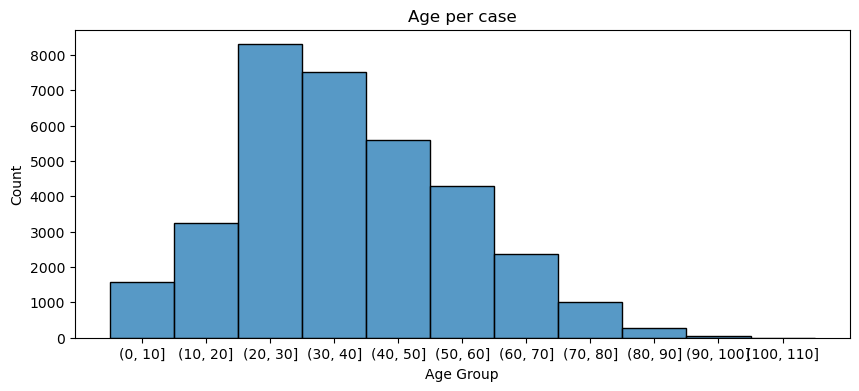

In [66]:
test_and_train_combined = cases_train.append(cases_test)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
age_corrected = test_and_train_combined[(test_and_train_combined["age"].notna()) & (test_and_train_combined["age"].str.isnumeric())].copy()
age_corrected["Age Group"] = pd.cut(pd.to_numeric(age_corrected["age"]), bins)
age_corrected = age_corrected[age_corrected["Age Group"].notna()]
age_corrected = age_corrected.sort_values("Age Group")
age_corrected["Age Group"] = age_corrected["Age Group"].astype(str) 
plt.figure(figsize=(10,4))
sns.histplot(age_corrected["Age Group"]).set(title="Age per case")
plt.savefig("../plots/task-1.3/Figure_1_Age_Distribution_Histogram.png")

# Figure 2: Male vs female distribution pie chart,

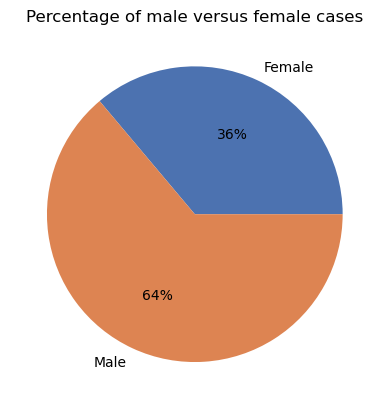

In [67]:
gender = test_and_train_combined.groupby("sex")["sex"].count()
colors = sns.color_palette('deep')[0:2]
plt.pie(x=[gender[0], gender[1]], labels=["Female", "Male"], colors=colors, autopct='%.0f%%')
plt.title("Percentage of male versus female cases")
plt.savefig("../plots/task-1.3/Figure_2_male_vs_female_distribution_pie_chart.png")
plt.show()


# Figure 3: Number of cases per month histogram,

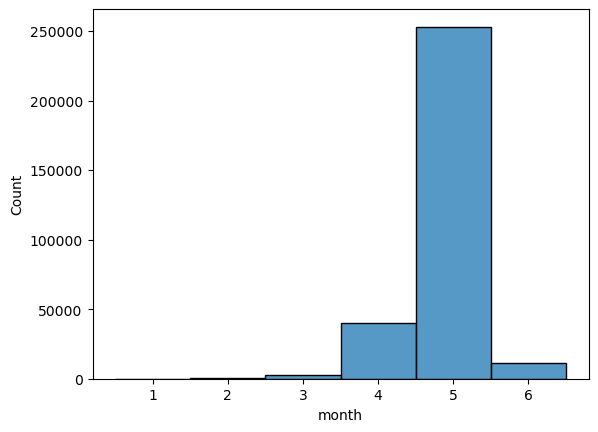

In [68]:
months_corrected = test_and_train_combined.copy()
months_corrected = months_corrected[(months_corrected["date_confirmation"].notna()) & (months_corrected["date_confirmation"].str.len() == 10)]
months_corrected["date_confirmation"] = pd.to_datetime(months_corrected["date_confirmation"], dayfirst=True)
months_corrected["month"] = months_corrected["date_confirmation"].apply(lambda x: str(x.month))
months_corrected = months_corrected.sort_values("month")
sns.histplot(months_corrected["month"])
plt.savefig("../plots/task-1.3/Figure_3_number_of_cases_per_month_histogram.png")

# Figure 4: Distribution of outcome group for all cases pie chart,

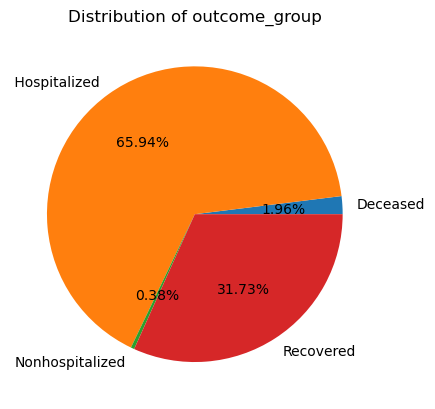

In [69]:
outcome = test_and_train_combined.groupby("outcome_group")["outcome_group"].count()
plt.pie(x=outcome, labels=["Deceased", " Hospitalized", "Nonhospitalized", "Recovered"], autopct='%.2f%%')
plt.title("Distribution of outcome_group")
plt.savefig("../plots/task-1.3/Figure_4_distribution_of_outcome_group_for_all_cases.png")
plt.show()

# Figure 5: Boxplot of case_fatality_ratio from location_2021.csv with some outliers removed,

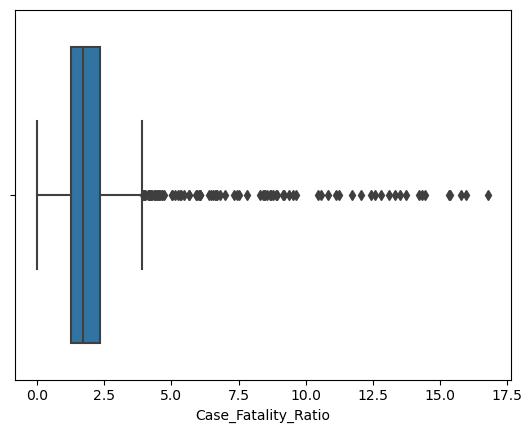

In [70]:
location_cleaned = location_2021[
    (location_2021["Case_Fatality_Ratio"].notna()) & 
    (location_2021["Case_Fatality_Ratio"] > 0) & 
    (location_2021["Case_Fatality_Ratio"] < 100) &
    (location_2021["Confirmed"] > 5000)
]
location_cleaned
sns.boxplot(data=location_cleaned, x="Case_Fatality_Ratio")
plt.savefig("../plots/task-1.3/Figure_5_boxplot_of_case_fatality_ratio_some_outliers_removed.png")

# Figure 6: Pie charts of how outcome_group changes based on age,

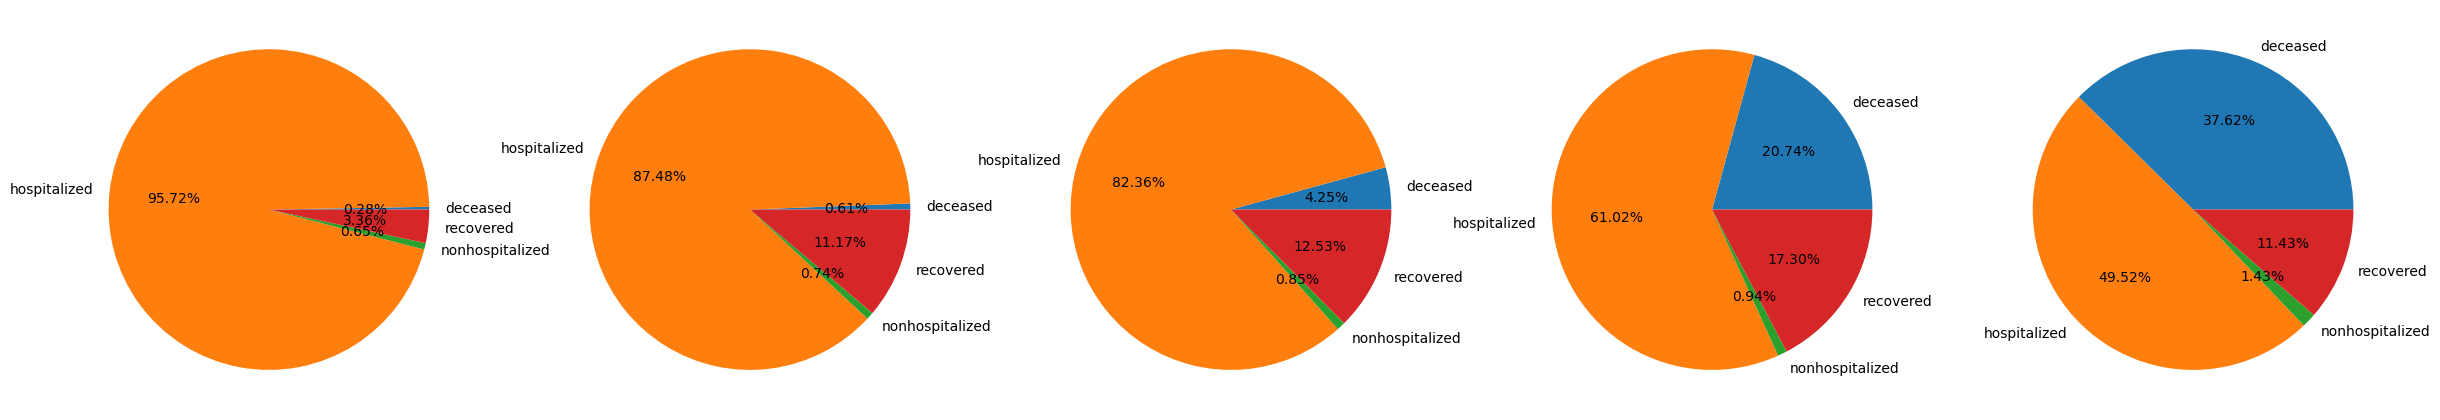

In [71]:
def print_outcome_per_age_group(age_group_min, age_group_max, title, fig):
  breakdown = age_corrected[ (age_corrected["Age Group"] == age_group_min) | (age_corrected["Age Group"] == age_group_max)]
  breakdown = breakdown.groupby("outcome_group")["outcome_group"].count()
  fig.pie(x=breakdown, labels=["deceased", "hospitalized", "nonhospitalized", "recovered"], autopct='%.2f%%')

fig, (plt1, plt2, plt3, plt4, plt5) = plt.subplots(1, 5)
fig.set_figheight(15)
fig.set_figwidth(30)

print_outcome_per_age_group("(0, 10]", "(10, 20]", "0-20 Age Group Outcome", plt1)
print_outcome_per_age_group("(20, 30]", "(30, 40]", "20-40 Age Group Outcome", plt2)
print_outcome_per_age_group("(40, 50]", "(50, 60]", "40-60 Age Group Outcome", plt3)
print_outcome_per_age_group("(60, 70]", "(70, 80]", "60-80 Age Group Outcome", plt4)
print_outcome_per_age_group("(80, 90]", "(90, 100]", "80-100 Age Group Outcome", plt5)

plt.savefig("../plots/task-1.3/Figure_6_pie_charts_outcome_group_change_with_age.png")

# Figure 7: Pie chart of outcome_group for entries with chronic_disease_binary=True,

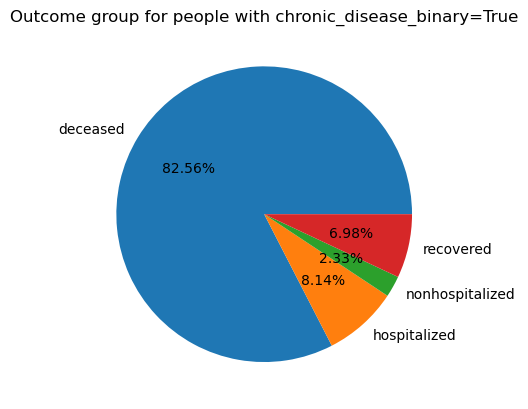

In [72]:
people_with_chronic_disease = test_and_train_combined[test_and_train_combined["chronic_disease_binary"] == True]
breakdown = people_with_chronic_disease.groupby("outcome_group")["outcome_group"].count()
plt.title("Outcome group for people with chronic_disease_binary=True")
plt.pie(x=breakdown, labels=["deceased", "hospitalized", "nonhospitalized", "recovered"], autopct='%.2f%%')
plt.savefig("../plots/task-1.3/Figure_7_outcome_group_distribution_for_chronic_disease_cases.png")

# Statistics 1: Number of countries in cases datasets

In [73]:
cases_per_country = cases_train[["country"]].append(cases_test[["country"]]).groupby(["country"]).size()
print("Total number of countries in cases_2021_train and cases_2021_test = " + str(len(cases_per_country)) + "\n")

Total number of countries in cases_2021_train and cases_2021_test = 51



# Statistics 2: Top 10 countries per case count in cases_2021_train and cases_2021_test

In [74]:
print("Top 10 countries per case count in cases_2021_train and cases_2021_test,\t")
print(cases_per_country.sort_values(ascending=False)[:10])

Top 10 countries per case count in cases_2021_train and cases_2021_test,	
country
India            301120
Philippines        4505
Ghana               378
Nigeria             257
China               255
Ethiopia            121
Singapore           118
Cameroon             78
United States        52
Zimbabwe             36
dtype: int64


# Printing number of missing values

In [75]:
# Printing number of missing values
def display_number_of_missing_attributes(df, dfColumns, fileName):
  print("\n" + fileName + " missing value per attribute count,")
  for column in dfColumns:
      print("\t" + column.title() + " = " + str(len(df[df[column].isna()])))

display_number_of_missing_attributes(cases_train, cases_train.columns[1:], "cases_2021_train.csv")
display_number_of_missing_attributes(cases_test, cases_test.columns, "cases_2021_test.csv")
display_number_of_missing_attributes(location_2021, location_2021.columns, "location_2021.csv")


cases_2021_train.csv missing value per attribute count,
	Age = 182793
	Sex = 180362
	Province = 604
	Country = 1
	Latitude = 0
	Longitude = 0
	Date_Confirmation = 51
	Additional_Information = 193444
	Source = 18394
	Chronic_Disease_Binary = 0
	Outcome_Group = 0

cases_2021_test.csv missing value per attribute count,
	Age = 90013
	Sex = 88765
	Province = 296
	Country = 1
	Latitude = 0
	Longitude = 0
	Date_Confirmation = 23
	Additional_Information = 95206
	Source = 9160
	Chronic_Disease_Binary = 0
	Outcome_Group = 101387

location_2021.csv missing value per attribute count,
	Province_State = 174
	Country_Region = 0
	Last_Update = 0
	Lat = 89
	Long_ = 89
	Confirmed = 0
	Deaths = 0
	Recovered = 3275
	Active = 3275
	Combined_Key = 0
	Incident_Rate = 90
	Case_Fatality_Ratio = 48
